In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math, random, requests, io
%matplotlib inline


In [2]:
import sys
!{sys.executable} -m pip install ipyleaflet
!{sys.executable} -m pip install ipywidgets

In [3]:
!jupyter nbextension enable --py --sys-prefix ipyleaflet
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [4]:
from ipyleaflet import (
    Map, basemaps, basemap_to_tiles, Circle, 
    Marker, FullScreenControl, LayersControl, 
    LayerGroup, CircleMarker, Polyline
)
# After importing, refresh the page to show the maps

In [5]:
# https://blog.jupyter.org/interactive-gis-in-jupyter-with-ipyleaflet-52f9657fa7a
center = (0, 0)
zoom=1

map_ = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=zoom)
map_.add_control(FullScreenControl())
map_.add_control(LayersControl())
display(map_)
# If the map does not show below, then you may need to refresh the browswer and run it again

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [6]:
map_.interact(zoom=(1,10,1))

Box(children=(IntSlider(value=1, description='zoom', max=10, min=1),))

## Loading the data

In [7]:
# Needed for when editing external modules
%load_ext autoreload
%autoreload
from datasetmanager import CovidManager

covid_manager = CovidManager()

datasets = covid_manager.getDatasets()

print(datasets)

{'covid_confirmed':     Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.000000  65.000000        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
261            NaN         Western Sahara  24.215500 -12.885800        0   
262            NaN  Sao Tome and Principe   0.186360   6.613081        0   
263            NaN                  Yemen  15.552727  48.516388        0   
264            NaN                Comoros -11.645500  43.333300        0   
265            NaN             Tajikistan  38.861034  71.276093        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/21/20  4/2

## Data analysis
A simple exploration of the data.

In [29]:
# Shows the dataset for deaths in the US
datasets['covid_us_deaths']

,UID,iso2,iso3,code3,FIPS,County,Province/State,Country/Region,Lat,Long,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,5,5,5,5,5,5,5,5,5,5
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,2,2,2,2,2,2,2,2,2,2
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,64,63,69,77,83,84,84,86,86,92
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,3,3,3,3,3,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,84070016.0,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,0,0,0,0,0,0,0,0,0,0
3257,84070017.0,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,0,0,0,0,0,0,0,0,0,0
3258,84070018.0,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,1,1,1,1,2,2,2,2,2,2
3259,84070019.0,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Dataset for the number of confirmed cases
datasets['covid_confirmed'].head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


In [31]:
# Outputs the number of days since the first recorded confirmed date
number_of_days = len(datasets['covid_confirmed'].count(axis='rows')) - 4
print("Number of days since first recorded confirmed case:", number_of_days)

Number of days since first recorded confirmed case: 100


The below block will find the latest date and create a dataset that only contains the current number of confirmed cases for each country + state/region

In [32]:
latest_date = datasets['covid_confirmed'].columns[-1] # number of confirmed cases to date
print("Latest date: ", latest_date)
df = datasets['covid_confirmed'].head(265)[['Country/Region', 'Province/State', 'Lat', 'Long', latest_date]]
df 

Latest date:  4/30/20


,Country/Region,Province/State,Lat,Long,4/30/20
0,Afghanistan,NaN,33.000000,65.000000,2171
1,Albania,NaN,41.153300,20.168300,773
2,Algeria,NaN,28.033900,1.659600,4006
3,Andorra,NaN,42.506300,1.521800,745
4,Angola,NaN,-11.202700,17.873900,27
...,...,...,...,...,...
260,South Sudan,NaN,6.877000,31.307000,35
261,Western Sahara,NaN,24.215500,-12.885800,6
262,Sao Tome and Principe,NaN,0.186360,6.613081,14
263,Yemen,NaN,15.552727,48.516388,6


Below will show the countries ordered by the number of cases. The US has significantly more (x4 at the time) cases they Spain.

In [33]:
dfsorted = df.sort_values(latest_date, ascending=False)
dfsorted

,Country/Region,Province/State,Lat,Long,4/30/20
225,US,NaN,37.0902,-95.7129,1069424
201,Spain,NaN,40.0000,-4.0000,213435
137,Italy,NaN,43.0000,12.0000,205463
223,United Kingdom,NaN,55.3781,-3.4360,171253
116,France,NaN,46.2276,2.2137,165764
...,...,...,...,...,...
78,China,Tibet,31.6927,88.0924,1
259,France,Saint Pierre and Miquelon,46.8852,-56.3159,1
264,Comoros,NaN,-11.6455,43.3333,1
231,Canada,Diamond Princess,0.0000,0.0000,0


### Australia Data

In [40]:
# Recorded Deaths (RD)
covid_deaths_df = datasets['covid_deaths']
ausRD = covid_deaths_df[['Province/State', latest_date]].loc[covid_deaths_df['Country/Region'] == 'Australia']
ausRD

,Province/State,4/30/20
8,Australian Capital Territory,3
9,New South Wales,41
10,Northern Territory,0
11,Queensland,6
12,South Australia,4
13,Tasmania,13
14,Victoria,18
15,Western Australia,8


In [50]:
ausRD.sum()

Province/State    Australian Capital TerritoryNew South WalesNor...
4/30/20                                                          93
dtype: object

In [51]:
# Finding the histogram of cases in Australia, confirmed, recovered and deaths
ausCC = df.loc[df['Country/Region'] == 'Australia'] # confirmed cases
ausRR = datasets['covid_recovered'][['Province/State', latest_date]].loc[df['Country/Region'] == 'Australia'] # rec. recovery

# Rename the confirmed cases
ausCC = ausCC.rename(columns={latest_date: "CC"})
ausRD = ausRD.rename(columns={latest_date: "RD"})
ausRR = ausRR.rename(columns={latest_date: "RR"})

# Merge the tables together
ausMerged = pd.merge(ausCC, ausRD, on='Province/State')
ausMerged = pd.merge(ausMerged, ausRR, on='Province/State')
ausMerged = ausMerged.sort_values('CC')
ausMerged

,Country/Region,Province/State,Lat,Long,CC,RD,RR
2,Australia,Northern Territory,-12.4634,130.8456,28,0,25
0,Australia,Australian Capital Territory,-35.4735,149.0124,106,3,103
5,Australia,Tasmania,-41.4545,145.9707,221,13,153
4,Australia,South Australia,-34.9285,138.6007,438,4,420
7,Australia,Western Australia,-31.9505,115.8605,551,8,507
3,Australia,Queensland,-28.0167,153.4000,1033,6,948
6,Australia,Victoria,-37.8136,144.9631,1364,18,1293
1,Australia,New South Wales,-33.8688,151.2093,3025,41,2293


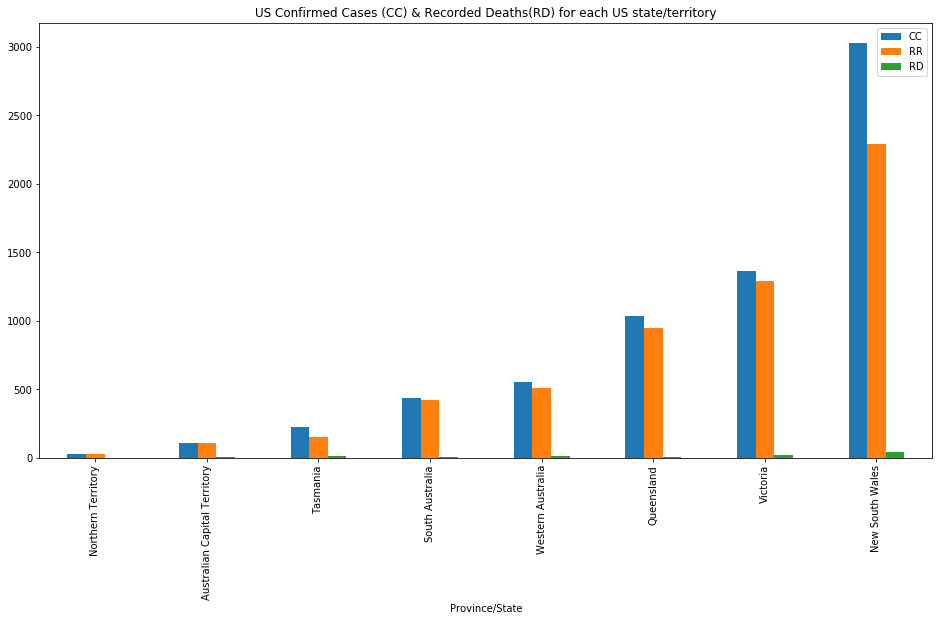

In [52]:
# Shows the bar graph for each state
title = 'US Confirmed Cases (CC) & Recorded Deaths(RD) for each US state/territory'
ausMerged.plot.bar(x='Province/State', y=['CC', 'RR', 'RD'], figsize=(16, 8), title=title)

In [53]:
datasets['covid_us_deaths']

,UID,iso2,iso3,code3,FIPS,County,Province/State,Country/Region,Lat,Long,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,5,5,5,5,5,5,5,5,5,5
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,2,2,2,2,2,2,2,2,2,2
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,64,63,69,77,83,84,84,86,86,92
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,3,3,3,3,3,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,84070016.0,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,0,0,0,0,0,0,0,0,0,0
3257,84070017.0,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,0,0,0,0,0,0,0,0,0,0
3258,84070018.0,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,1,1,1,1,2,2,2,2,2,2
3259,84070019.0,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,0,0,0,0,0,0,0,0,0,0


### US bar graphs

In [54]:
# Finding the histogram of cases in Australia, confirmed, recovered and deaths
usCC = datasets['covid_us_confirmed'][['Province/State', latest_date]].groupby(['Province/State']).sum() # confirmed cases
usRD = datasets['covid_us_deaths'][['Province/State', latest_date]].groupby(['Province/State']).sum() # Recorded deaths

# Rename the confirmed cases
usCC = usCC.rename(columns={latest_date: "CC"}).reset_index()
usRD = usRD.rename(columns={latest_date: "RD"}).reset_index()

# Merge the tables together
usMerged = pd.merge(usCC, usRD, on='Province/State')
usMerged = usMerged.sort_values('CC')
usMerged

,Province/State,CC,RD
2,American Samoa,0,0
37,Northern Mariana Islands,14,2
50,Virgin Islands,66,4
12,Guam,145,5
1,Alaska,355,5
28,Montana,453,16
55,Wyoming,559,1
13,Hawaii,609,16
49,Vermont,863,49
36,North Dakota,1067,19


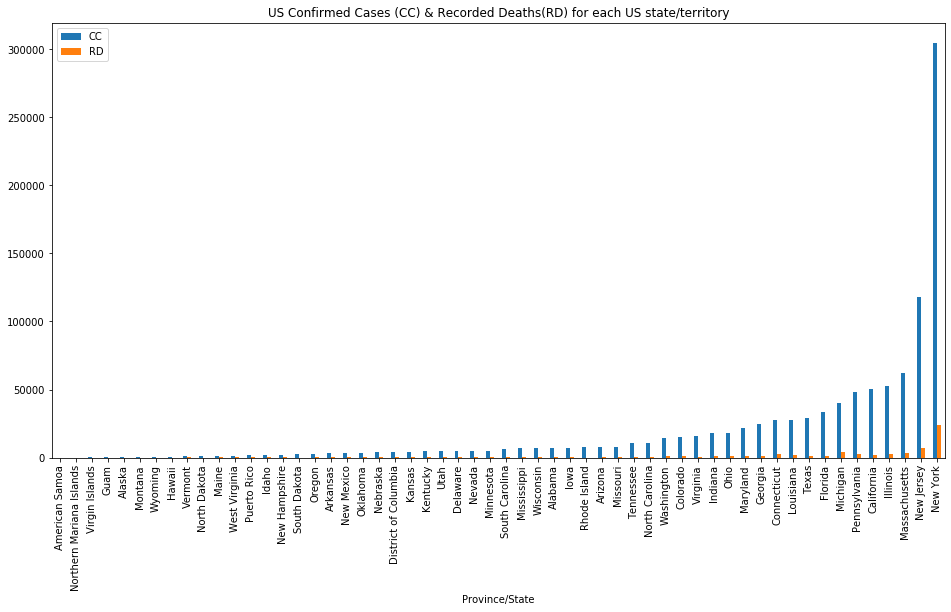

In [55]:
title = 'US Confirmed Cases (CC) & Recorded Deaths(RD) for each US state/territory'
usMerged.plot.bar(x='Province/State', y=['CC', 'RD'], figsize=(16, 8), title=title)

# Maps

In [56]:
# This function generates a graph given the dataframe
# df - dataframe containing the data, pymap - map to be given to, 
# G - graph, scale - scale of the number of cases
# output - circle_layer - to delete this later
def generateGraph(df, pymap, G, date, scale=1):
    marker_layer = LayerGroup(name='markers')
    circle_layer = LayerGroup(name='circles')
    pos = {}
    
    for index, row in df.iterrows():
        coords = (row['Lat'], row['Long'])
        name = row['Country/Region']
        
        # Adds the state or province if the point has one
        if not pd.isnull(row['Province/State']):
            name += ' - ' + row['Province/State']
            if None != G:
                pos[name] = coords # Add to pos dict for drawing
                G.add_node(row['Province/State'], pos=coords) 
        elif None != G:
            pos[name] = coords # Add to pos dict for drawing
            G.add_node(name, pos=coords) 
            
        # Add number of cases in the title
        name += ' - Confirmed:' + str(row[date])
            
        # Adds the nodes to the graph
        
        
        # Marker
        if (row[date] > 0):
            marker = Marker(location=coords, draggable=False, title=name, opacity=0.0)
            marker_layer.add_layer(marker)
            #pymap.add_layer(marker)
        
        # Circle
        if (row[date] > 0):
            circle = Circle(location=coords, radius=round(row[date]*scale), color='red', fill_color='red')
            circle_layer.add_layer(circle)
            #pymap.add_layer(circle)
        
    pymap.add_layer(marker_layer)
    pymap.add_layer(circle_layer)

In [57]:
# Generate map for the confirmed cases
confirmedCasesGraph = nx.Graph()

confirmedMap = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=zoom)
confirmedMap.add_control(FullScreenControl())


generateGraph(df, confirmedMap, confirmedCasesGraph, latest_date, 1.2)
confirmedMap.add_control(LayersControl())

In [58]:
confirmedMap

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In this map you can see the dots represent the number of confirmed cases with the circle's radius representing the number of cases. The larger the circle, the higher number of cases the country/state/provice has.

### Australia
Below will show only Australia's Cases

In [59]:
# Create a separate dataframe for australian cities
ausCities = df.loc[df['Country/Region'] == 'Australia']
ausCities

,Country/Region,Province/State,Lat,Long,4/30/20
8,Australia,Australian Capital Territory,-35.4735,149.0124,106
9,Australia,New South Wales,-33.8688,151.2093,3025
10,Australia,Northern Territory,-12.4634,130.8456,28
11,Australia,Queensland,-28.0167,153.4000,1033
12,Australia,South Australia,-34.9285,138.6007,438
13,Australia,Tasmania,-41.4545,145.9707,221
14,Australia,Victoria,-37.8136,144.9631,1364
15,Australia,Western Australia,-31.9505,115.8605,551


In [60]:
ausGraph = nx.Graph()

ausMap = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=(-28, 138), zoom=4)
ausMap.add_control(FullScreenControl())
ausMap.add_control(LayersControl())

generateGraph(ausCities, ausMap, ausGraph, latest_date, 50)
display(ausMap)

Map(center=[-28, 138], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [61]:
ausMap.interact(zoom=(1,10,1))

Box(children=(IntSlider(value=4, description='zoom', max=10, min=1),))

## Timeline
Below will show code to show the progression of cases in Australia with time.

In [62]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [63]:
dfaus = datasets['covid_confirmed'].loc[df['Country/Region'] == 'Australia']
ausMapTimeline = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=(-28, 138), zoom=4)
ausMapTimeline.add_control(FullScreenControl())
ausMapTimeline.add_control(LayersControl())

circle_layer_aus = LayerGroup(name='circles')
marker_layer_aus = LayerGroup(name='markers')

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
# This function generates a graph given the dataframe, this is optimized for the timeline display
# df - dataframe containing the data, pymap - map to be given to, scale - scale of the number of cases (circle size)
# output - circle_layer - to delete this later
def generateGraphTimeline(df, pymap, date, circle_layer_aus, marker_layer_aus, showMarkers, scale=1):
    for index, row in df.iterrows():
        coords = (row['Lat'], row['Long'])
        
        # Everything to do with markers, can be selected to be off
        if showMarkers:
            name = row['Country/Region']

            # Adds the state or province if the point has one
            if not pd.isnull(row['Province/State']):
                name += ' - ' + row['Province/State']

            # Add number of cases in the title
            name += ' - Confirmed: ' + str(row[date])

            # Marker
            marker = Marker(location=coords, draggable=False, title=name, opacity=0.1)
            marker_layer_aus.add_layer(marker)
        
        # Circle
        if (row[date] > 0):
            circle = CircleMarker(location=coords, radius=round(row[date]*scale), color='red', fill_color='red')
            circle_layer_aus.add_layer(circle)
            
    pymap.add_layer(circle_layer_aus)
    if showMarkers:
        marker_layer_aus.name = 'markers'
        pymap.add_layer(marker_layer_aus)

In [ ]:
def f(date, showMarkers):
    # Gets the data from the selected date
    date = dfaus.columns[date+3] # number of confirmed cases to date
    ausCities = dfaus[['Country/Region', 'Province/State', 'Lat', 'Long', date]]
    
    # Removes the old circle/marker layer
    if circle_layer_aus in ausMapTimeline.layers:
        ausMapTimeline.remove_layer(circle_layer_aus)
        circle_layer_aus.clear_layers()
    
    if marker_layer_aus in ausMapTimeline.layers:
        ausMapTimeline.remove_layer(marker_layer_aus)
        marker_layer_aus.clear_layers()
    
    # Generates and adds the new layer
    generateGraphTimeline(ausCities, ausMapTimeline, date, circle_layer_aus, marker_layer_aus, showMarkers, 0.02)

    return date

### Timeline Map

In [ ]:
display(ausMapTimeline)

In [ ]:
# Slider: days since first confirmed case
interact(f, date=(1, number_of_days), showMarkers=widgets.Checkbox());

Usage of map above: Move the slider to see the number of confirmed cases represented with the radius of the circle with respect to time. Move the slider to the very right to see the latest number of cases. You can select to show markers which will show the number of confirmed cases when you hover your mouse over the marker.

In [ ]:
# Compare with the us

In [ ]:
# Rate of change Aus Vs US

In [ ]:
from covid_data import CovidData
from dateutil.parser import parse

def plot_max_percent_changes(data_point, title, bin_region_column='country', country=None, limit=None, thresh=50):
    covid_data_obj = CovidData()
    data, routes = covid_data_obj.getData(bin_region_column=bin_region_column, country=country)
    
    locations = []
    max_percent_changes = []
    
    df = data[data_point].copy(deep=True)
    columns = df.columns
    dates = []
    
    for ii in range(len(columns)):
        try:
            parse(columns[ii])
            dates = columns[ii:]
            break
        except:
            pass
    
    for _index, row in df.iterrows():
        percent_changes = []
        for ii in range(len(dates)-1):
            if row[dates[ii]] < thresh:
                # Ignore small numbers, would show an artificial percent spike in change
                percent_changes.append(0)
                continue
            percent_changes.append(row[dates[ii + 1]]/row[dates[ii]])
        
        max_pc = max(percent_changes)
        # Ignore the location if there isn't sufficient data (max percent change is 0)
        if max_pc == 0: continue
            
        location_str = ""
        
        
        if bin_region_column == 'county':
            county = row['County']
            if not county == 'none':
                location_str = county
            location_str = location_str + " " + row['Province/State']
        
        if bin_region_column == 'state':
            state = row['Province/State']
            if not state == 'none':
                location_str = location_str + " " + state
                
        curr_country = row['Country/Region']
        location_str = location_str + " " + curr_country
        locations.append(location_str)
        max_percent_changes.append(max(percent_changes))
        
    new_df = pd.DataFrame({'Locations' : locations, 'Max Percent Change': max_percent_changes})
    new_df = new_df.sort_values('Max Percent Change')
    
    if not limit == None:
        new_df = new_df.tail(limit)
    
    new_df.plot.bar(x='Locations', y='Max Percent Change', figsize=(16,8), title=title)

In [ ]:
plot_max_percent_changes('confirmed', "Max Percent Changes for Confirmed", limit=50)

In [ ]:
plot_max_percent_changes('deaths', "Max Percent Changes for Deaths (US County)", bin_region_column='county', country='US', limit=50)

In [ ]:
plot_max_percent_changes('deaths', "Max Percent Changes for Deaths (US County)", bin_region_column='state', country='US', limit=50)

# Flights Data
An Analysis of Route data from airport to airport to see if flights effect the rate of spread.

In [64]:
# Looking at the table data

In [65]:
from covid_data import CovidData
covid_data = CovidData()

In [66]:
covid_cases_aus, ausRoutes = covid_data.getData(bin_region_column='state', country='Australia', specific_date=latest_date)

In [67]:
covid_cases_aus

{'confirmed':                  Province/State Country/Region      Lat      Long  4/30/20
 0  Australian Capital Territory      Australia -35.4735  149.0124      106
 1               New South Wales      Australia -33.8688  151.2093     3025
 2            Northern Territory      Australia -12.4634  130.8456       28
 3                    Queensland      Australia -28.0167  153.4000     1033
 4               South Australia      Australia -34.9285  138.6007      438
 5                      Tasmania      Australia -41.4545  145.9707      221
 6                      Victoria      Australia -37.8136  144.9631     1364
 7             Western Australia      Australia -31.9505  115.8605      551,
 'deaths':                  Province/State Country/Region      Lat      Long  4/30/20
 0  Australian Capital Territory      Australia -35.4735  149.0124        3
 1               New South Wales      Australia -33.8688  151.2093       41
 2            Northern Territory      Australia -12.4634  130.84

In [68]:
ausRoutes

,DepartProvince/State,DepartCountry/Region,ArrivalProvince/State,ArrivalCountry/Region,NumberOfRoutes
0,Australian Capital Territory,Australia,Australian Capital Territory,Australia,1
1,Australian Capital Territory,Australia,New South Wales,Australia,124
2,Australian Capital Territory,Australia,Queensland,Australia,23
3,Australian Capital Territory,Australia,South Australia,Australia,3
4,Australian Capital Territory,Australia,Victoria,Australia,51
5,Australian Capital Territory,Australia,Western Australia,Australia,2
6,New South Wales,Australia,Australian Capital Territory,Australia,107
7,New South Wales,Australia,New South Wales,Australia,127
8,New South Wales,Australia,Northern Territory,Australia,6
9,New South Wales,Australia,Queensland,Australia,239


In [69]:
ausCases = covid_cases_aus['confirmed']
ausCases

,Province/State,Country/Region,Lat,Long,4/30/20
0,Australian Capital Territory,Australia,-35.4735,149.0124,106
1,New South Wales,Australia,-33.8688,151.2093,3025
2,Northern Territory,Australia,-12.4634,130.8456,28
3,Queensland,Australia,-28.0167,153.4000,1033
4,South Australia,Australia,-34.9285,138.6007,438
5,Tasmania,Australia,-41.4545,145.9707,221
6,Victoria,Australia,-37.8136,144.9631,1364
7,Western Australia,Australia,-31.9505,115.8605,551


In [70]:
# Gets the coordinates of the state/country given state/country
def getCoordinates(place, cases):
    df = cases.loc[cases['Province/State'] == place]
    return df.iloc[0]['Lat'], df.iloc[0]['Long']

In [71]:
# Example of function usages
getCoordinates('Tasmania', ausCases)

(-41.4545, 145.9707)

In [93]:
# Generates the line layer for the routes
def generateRoutes(routes, cases, Graph=None):
    locations = []
    maxRoute = max(routes['NumberOfRoutes']) # Route with most flights, for calculating opacity
    line_layer = LayerGroup(name='Lines')

    for index, row in routes.iterrows():
        
        # Add line
        line = Polyline(locations=[getCoordinates(row[0], cases), getCoordinates(row[2], cases)], color='blue', opacity=row[4]/maxRoute)
        line_layer.add_layer(line)
        
        # Add edge to the graph
        if Graph != None:
            Graph.add_edge(row[0], row[2], weight=row[4])
    
    return line_layer

In [86]:
# Map of Australia with flights

In [94]:
# Generate the Map
ausMapFlights = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=(-28, 138), zoom=4)
ausMapFlights.add_control(FullScreenControl())
ausMapFlights.add_control(LayersControl())

ausGraphFlights = nx.Graph()

circle_layer_aus_flights = LayerGroup(name='circles')
marker_layer_aus_flights = LayerGroup(name='markers')

generateGraph(ausCities, ausMapFlights, ausGraphFlights, latest_date, scale=50)

In [95]:
ausMapFlights.add_layer(generateRoutes(ausRoutes, ausCases, ausGraphFlights))

In [96]:
ausMapFlights

Map(center=[-28, 138], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [97]:
# Map of US with flights

In [78]:
covid_cases_us, usRoutes = covid_data.getData(bin_region_column='state', country='US', specific_date=latest_date)
usCases = covid_cases_us['confirmed']
usCases

,Province/State,Country/Region,Lat,Long,4/30/20
0,Alabama,US,32.884280,-86.710122,7088
1,Alaska,US,60.261375,-145.838598,355
2,American Samoa,US,-14.271000,-170.132000,0
3,Arizona,US,33.675904,-111.463232,7655
4,Arkansas,US,34.911889,-92.433978,3113
5,California,US,37.843962,-120.728594,50130
6,Colorado,US,38.935474,-105.486240,15126
7,Connecticut,US,41.613680,-72.656830,27238
8,Delaware,US,39.109277,-75.533237,4709
9,District of Columbia,US,38.904178,-77.016560,4323


In [79]:
# Generate the Map
usMapFlights = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=(38.451217, -102.675199), zoom=4)
usMapFlights.add_control(FullScreenControl())
usMapFlights.add_control(LayersControl())

usGraphFlights = nx.Graph()

circle_layer_us_flights = LayerGroup(name='circles')
marker_layer_us_flights = LayerGroup(name='markers')

generateGraph(usCases, usMapFlights, usGraphFlights, latest_date, scale=1)

In [80]:
# May take some time to load
usMapFlights.add_layer(generateRoutes(usRoutes, usCases, usGraphFlights))

In [81]:
usMapFlights

Map(center=[38.451217, -102.675199], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [82]:
usGraphFlights.nodes

NodeView(('Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'))

In [83]:
# Graph analysis

In [98]:
# Add edges
ausGraphFlights.edges

EdgeView([('Australian Capital Territory', 'Australian Capital Territory'), ('Australian Capital Territory', 'New South Wales'), ('Australian Capital Territory', 'Queensland'), ('Australian Capital Territory', 'South Australia'), ('Australian Capital Territory', 'Victoria'), ('Australian Capital Territory', 'Western Australia'), ('New South Wales', 'New South Wales'), ('New South Wales', 'Northern Territory'), ('New South Wales', 'Queensland'), ('New South Wales', 'South Australia'), ('New South Wales', 'Tasmania'), ('New South Wales', 'Victoria'), ('New South Wales', 'Western Australia'), ('Northern Territory', 'Northern Territory'), ('Northern Territory', 'Queensland'), ('Northern Territory', 'South Australia'), ('Northern Territory', 'Victoria'), ('Northern Territory', 'Western Australia'), ('Queensland', 'Queensland'), ('Queensland', 'South Australia'), ('Queensland', 'Tasmania'), ('Queensland', 'Victoria'), ('Queensland', 'Western Australia'), ('South Australia', 'South Australia'

In [100]:
# This function will draw the network
def draw_graph(G, size):
    plt.figure(1,figsize=(size,size)) # This will make the graph larger, easier to read
    edge_list = [(u, v) for (u, v, d) in G.edges(data=True)]
    pos = nx.spring_layout(G, scale=3) # positions nodes
    labels = nx.get_edge_attributes(G, 'Distance')
    
    nx.draw_networkx_nodes(G, pos, node_size=700, with_labels=True)
    nx.draw_networkx_edges(G, pos, edgelist=edge_list)
    nx.draw_networkx_labels(G, pos, font_size=16)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)

C:\Users\Ethan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


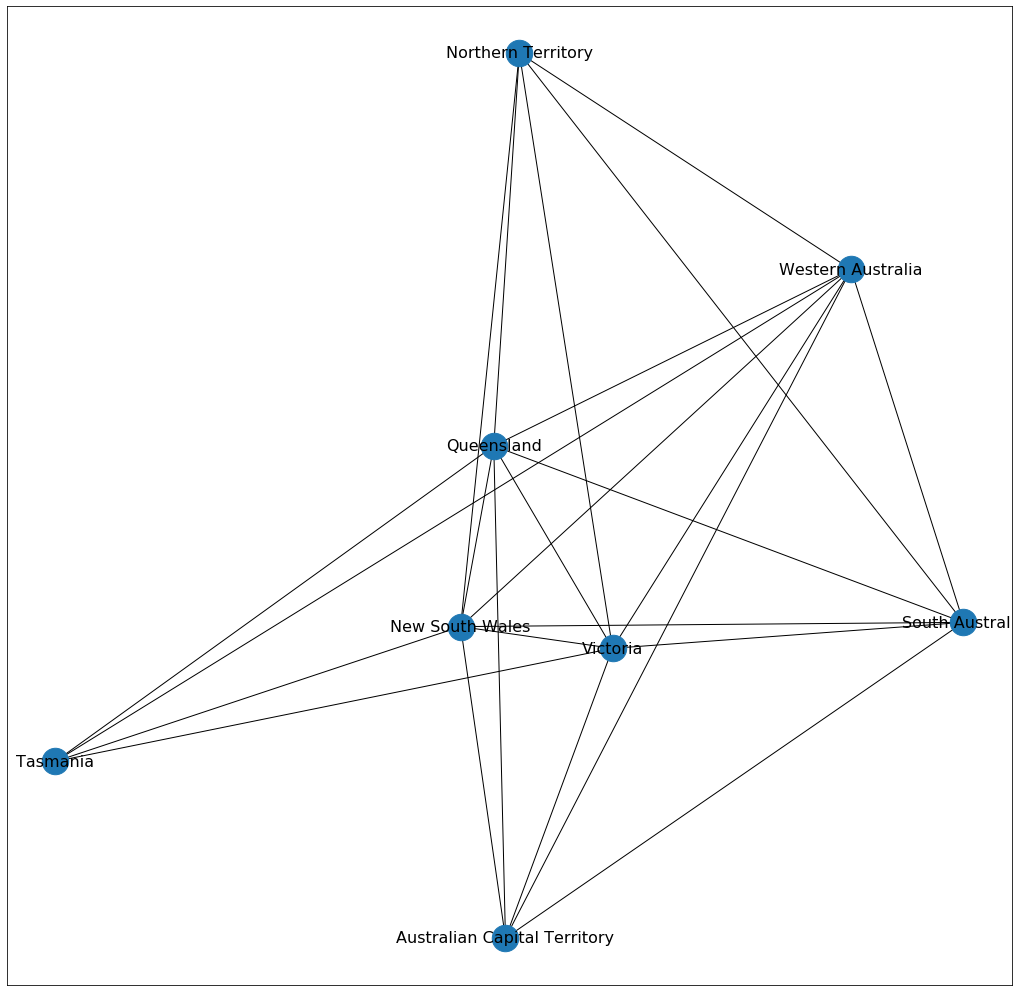

In [101]:
draw_graph(ausGraphFlights,18)

## Resources
Resources that were useful.

Layers Control:
* Documentation: https://ipyleaflet.readthedocs.io/en/latest/api_reference/layers_control.html
* Layers Control naming: https://github.com/jupyter-widgets/ipyleaflet/issues/293